<a href="https://colab.research.google.com/github/nandikathapa4-gif/nandika-thapa-projects/blob/main/FinTech_Survey_Analysis_Nepal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impact of FinTech on Traditional Banking in Nepal**

**Introduction**                          Primary survey with 110+ responses on adoption, satisfaction, and challenges.

Nepal’s financial sector is undergoing a transformative shift, driven by technological innovations that promise to democratize access to banking services. Historically, Nepal’s banking system has been constrained by geographic barriers, limited infrastructure, and a large unbanked population. According to the World Bank’s Global Findex Database (2021), only 32% of Nepali adults had a bank account in 2021, with rural areas lagging significantly behind urban centers. This gap has perpetuated economic exclusion, particularly for women, rural residents, and low-income

**The Importance of FinTech: NeBEU Perspectives**



Bhusal’s (2025) NeBEU article offers a balanced view of FinTech’s opportunities and challenges. He argues that FinTech can drive financial inclusion by reaching remote areas and reducing transaction costs. Yet, he warns that regulatory gaps and data privacy concerns could undermine trust. For example, a 2023 NRB survey found that 40% of FinTech users were unaware of data protection policies.
2.5 Comparative Analysis: Regional FinTech Models
India: The UPI system enables seamless interoperability, processing 1 billion transactions monthly. Nepal could adopt a similar model to unify its fragmented payment systems.
Bangladesh: bKash’s rural penetration strategy—offering microloans and savings accounts—has onboarded 50 million users. Nepal’s FinTech startups could replicate this model.
China: Alipay and WeChat Pay have embedded digital payments into daily life, processing $3 trillion annually. Nepal’s tourism sector could benefit from such integration.
2.6 Critical Analysis: Lessons for Nepal
Nepal’s FinTech ecosystem faces unique challenges, including:
Regulatory Uncertainty: NRB’s policies (e.g., FinTech Policy 2022) lack clarity on emerging technologies like blockchain and cryptocurrency.
Infrastructure Gaps: Rural areas lack reliable internet and power, limiting FinTech adoption.
Consumer Trust: Hidden fees and cybersecurity risks deter many users, particularly in underserved communities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/My Drive/GITHUB/fintech_responses.csv')  # Load the CSV file from Google Drive/GITHUB
display(df.head(10))

# Q7: Branch visits reduction
plt.figure(figsize=(8,5))
df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].value_counts().plot(kind='bar', color='teal')
plt.title('Impact on Physical Bank Visits')
plt.ylabel('Responses')
plt.xticks(rotation=45, ha='right')
plt.show()

# Q8: Satisfaction
plt.figure(figsize=(6,4))
df['Q8. How satisfied are you with FinTech services compared to traditional banking?'].astype(int).value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Satisfaction Level (1-5)')
plt.xlabel('Score')
plt.show()

# Q9: Adoption reasons (multi-select split)
reasons = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.split(', ').explode().str.strip()
top_reasons = reasons.value_counts().head(10)
top_reasons.plot(kind='barh', color='skyblue')
plt.title('Top Adoption Drivers')
plt.xlabel('Responses')
plt.show()

# Q13: Future outlook
plt.figure(figsize=(6,6))
df['Q13. Do you think FinTech services will replace traditional banking in Nepal in the next 10 years?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Will FinTech Replace Traditional Banking?')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/GITHUB/fintech_responses.csv'

### Q1: Age Group Distribution

In [ ]:
plt.figure(figsize=(8, 5))
df['Q1. Age Group'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Age Group Distribution of Respondents')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

### Q2: Location (City) Distribution

In [ ]:
plt.figure(figsize=(8, 5))
df['Q2. Location (City)'].value_counts().plot(kind='bar', color='darkorange')
plt.title('Location Distribution of Respondents')
plt.xlabel('City')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

### Q3: Gender Distribution

In [ ]:
plt.figure(figsize=(6, 6))
df['Q3. Occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Occupation Distribution of Respondents')
plt.ylabel('') # Hide y-label for pie chart
plt.show()

### Q4: Education Level Distribution

In [ ]:
plt.figure(figsize=(10, 6))
df['Q4. Which financial services do you currently use most?'].value_counts().plot(kind='barh', color='darkgreen')
plt.title('Financial Services Used Most by Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Financial Service')
plt.show()

### Q5: Occupation Distribution

In [ ]:
plt.figure(figsize=(10, 6))
df['Q5. How often do you use FinTech services (e.g., mobile wallets, online payments)?'].value_counts().plot(kind='barh', color='indigo')
plt.title('Frequency of FinTech Service Use by Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Frequency')
plt.show()

### Q6: Income Level Distribution

In [ ]:
plt.figure(figsize=(10, 6))
df['Q6. What services do you primarily use mobile wallets or digital banking for?'].value_counts().plot(kind='barh', color='brown')
plt.title('Primary Types of FinTech Services Used by Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Service Type')
plt.show()

### Q10: Challenges Faced with FinTech Services

In [ ]:
challenges = df['Q10. What challenges or issues have you faced while using FinTech services?'].str.split(', ').explode().str.strip()
top_challenges = challenges.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_challenges.plot(kind='barh', color='salmon')
plt.title('Top Challenges Faced with FinTech Services')
plt.xlabel('Number of Responses')
plt.ylabel('Challenge')
plt.show()

### Q11: Frequency of FinTech Service Use

In [ ]:
plt.figure(figsize=(8, 5))
df['Q11. Do you think traditional banks in Nepal are keeping up with digital innovations?'].value_counts().plot(kind='bar', color='olive')
plt.title('Traditional Banks and Digital Innovations')
plt.xlabel('Response')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

### Q12: Primary Types of FinTech Services Used

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
unique_locations = filtered_location_reasons_df['Location'].unique()

for location in unique_locations:
    location_data = filtered_location_reasons_df[filtered_location_reasons_df['Location'] == location]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Reason', y='Count', hue='Reason', data=location_data, palette='viridis', legend=False)
    plt.title(f'Top FinTech Adoption Reasons in {location}', fontsize=16)
    plt.xlabel('FinTech Adoption Reason', fontsize=12)
    plt.ylabel('Number of Responses', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



## Statistical Inference and Regression Analysis

To move beyond descriptives, we test associations and model predictors of branch visit reduction.

In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import numpy as np

In [ ]:
# Create binary outcome (~90% Yes from your data)
df['Reduced_Visits'] = df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].str.strip().map({'Yes': 1, 'No': 0})

# Example: Dummy for primary driver 'Convenience' (from multi-select explode)
reasons_exploded = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.split(', ').explode().str.strip()
convenience_users = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.contains('Convenience', case=False, na=False)
df['Driver_Convenience'] = convenience_users.astype(int)

# Encode occupation (students dominant in your data)
df = pd.get_dummies(df, columns=['Q3. Occupation'], drop_first=True)

# Drop NaN for modelling
df_model = df.dropna(subset=['Reduced_Visits', 'Driver_Convenience'] + [col for col in df.columns if col.startswith('Q3. Occupation_')])
display(df_model.head())

In [ ]:
# Use student dummy (likely present given 57.7%)
student_col = [col for col in df_model.columns if 'Student' in col][0]  # Auto-detect
contingency = pd.crosstab(df_model[student_col], df_model['Reduced_Visits'])
display(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")
print("Interpretation: Significant if p < 0.05 – e.g., students more likely to reduce visits.")

In [ ]:
numeric_cols = df_model.select_dtypes(include=['float64', 'int64', 'uint8']).columns
corr = df_model[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

In [ ]:
X = df_model[['Driver_Convenience'] + [col for col in df_model.columns if col.startswith('Q3. Occupation_')]]
X = sm.add_constant(X)
y = df_model['Reduced_Visits']

logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=0)  # Suppress convergence messages
print(result.summary())
print("\nOdds Ratios:")
print(np.exp(result.params))
print("Interpretation: Convenience driver likely shows odds ratio >1, increasing probability of reduced visits.")

### Key Inferential Findings
- Convenience emerges as a significant predictor, aligning with NRB 2024/25 digital transaction surge (+71%).
- Policy implications: Strengthen security/connectivity for broader adoption – parallels to EU digital finance regulation.
- Limitations: Convenience sampling; future work could include econometric panel analysis.

# Task
Review the statistical analysis and regression results for the FinTech impact data, focusing on the Chi-Square test, correlation heatmap, and the logistic regression model's summary and odds ratios.

## Add Statistical Inference Section Title

### Subtask:
Insert a new markdown cell with the title '## Statistical Inference and Regression Analysis' to introduce the next section of the analysis.


## Statistical Inference and Regression Analysis

## Statistical Inference and Regression Analysis

## Import Statistical Libraries

### Subtask:
Insert a new code cell to import necessary libraries for statistical analysis: `statsmodels.api`, `scipy.stats.chi2_contingency`, and `numpy`.


**Reasoning**:
The subtask is to import specific statistical libraries. I will add a code cell to import `statsmodels.api`, `scipy.stats.chi2_contingency`, and `numpy` as requested.



In [2]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import numpy as np

## Preprocess Data for Modeling

### Subtask:
Insert a new code cell to preprocess the DataFrame. This involves creating a binary outcome variable 'Reduced_Visits' from 'Q7', a dummy variable 'Driver_Convenience' from 'Q9', and one-hot encoding 'Q3. Occupation' to prepare data for statistical models. It will also display the head of the preprocessed DataFrame.


**Reasoning**:
The subtask requires preprocessing the DataFrame by creating new variables, performing one-hot encoding, and then dropping rows with missing values to prepare the data for statistical modeling. This will be done in a new code cell.



In [3]:
df['Reduced_Visits'] = df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].str.strip().map({'Yes': 1, 'No': 0})

convenience_users = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.contains('Convenience', case=False, na=False)
df['Driver_Convenience'] = convenience_users.astype(int)

df = pd.get_dummies(df, columns=['Q3. Occupation'], drop_first=True)

# Dynamically get the list of occupation dummy columns created by pd.get_dummies
occupation_cols = [col for col in df.columns if col.startswith('Q3. Occupation_')]

# Drop NaN for modelling
df_model = df.dropna(subset=['Reduced_Visits', 'Driver_Convenience'] + occupation_cols)
display(df_model.head())

NameError: name 'df' is not defined

**Reasoning**:
The previous code failed because the DataFrame 'df' was not defined. This was due to a 'FileNotFoundError' when reading the CSV, likely because Google Drive was not mounted. The fix involves mounting Google Drive, reloading the DataFrame 'df' correctly from the specified path, and then proceeding with the data preprocessing steps as requested in the subtask.



In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Reload the DataFrame after mounting the drive
df = pd.read_csv('/content/drive/My Drive/GITHUB/fintech_responses.csv')  # Load the CSV file from Google Drive/GITHUB

# Preprocessing steps as per the subtask
df['Reduced_Visits'] = df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].str.strip().map({'Yes': 1, 'No': 0})

convenience_users = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.contains('Convenience', case=False, na=False)
df['Driver_Convenience'] = convenience_users.astype(int)

df = pd.get_dummies(df, columns=['Q3. Occupation'], drop_first=True)

# Dynamically get the list of occupation dummy columns created by pd.get_dummies
occupation_cols = [col for col in df.columns if col.startswith('Q3. Occupation_')]

# Drop NaN for modelling
df_model = df.dropna(subset=['Reduced_Visits', 'Driver_Convenience'] + occupation_cols)
display(df_model.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,Q1. Age Group,Q2. Location (City),Q4. Which financial services do you currently use most?,"Q5. How often do you use FinTech services (e.g., mobile wallets, online payments)?",Q6. What services do you primarily use mobile wallets or digital banking for?,Q7. Has the use of FinTech services reduced your visits to physical bank branches?,Q8. How satisfied are you with FinTech services compared to traditional banking?,Q9. What are the main reasons you use FinTech services over traditional banking?,Q10. What challenges or issues have you faced while using FinTech services?,Q11. Do you think traditional banks in Nepal are keeping up with digital innovations?,Q13. Do you think FinTech services will replace traditional banking in Nepal in the next 10 years?,Email Address,Reduced_Visits,Driver_Convenience,Q3. Occupation_Other,Q3. Occupation_Student,Q3. Occupation_Unemployed,Q3. Occupation_Working Professional


**Reasoning**:
The previous output showed an `Empty DataFrame` for `df_model`, indicating that all rows were dropped during the `dropna` step. This suggests that there are `NaN` values in the critical columns created or used for modeling. To diagnose the problem, I need to inspect the value counts and `NaN` occurrences in `Reduced_Visits`, `Driver_Convenience`, and the `Q3. Occupation` related columns before applying `dropna`. The fix will involve printing diagnostic information to identify the source of the `NaN`s that cause `df_model` to become empty, and then modify the `dropna` subset to only include columns that are essential for the next steps and are expected to be clean.



In [5]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Reload the DataFrame after mounting the drive
df = pd.read_csv('/content/drive/My Drive/GITHUB/fintech_responses.csv')  # Load the CSV file from Google Drive/GITHUB

# Preprocessing steps as per the subtask
df['Reduced_Visits'] = df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].str.strip().map({'Yes': 1, 'No': 0})

convenience_users = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.contains('Convenience', case=False, na=False)
df['Driver_Convenience'] = convenience_users.astype(int)

df = pd.get_dummies(df, columns=['Q3. Occupation'], drop_first=True)

# Dynamically get the list of occupation dummy columns created by pd.get_dummies
occupation_cols = [col for col in df.columns if col.startswith('Q3. Occupation_')]

# --- Diagnostics ---
print("Value counts for Reduced_Visits (including NaNs):")
print(df['Reduced_Visits'].value_counts(dropna=False))
print("\nValue counts for Driver_Convenience (including NaNs):")
print(df['Driver_Convenience'].value_counts(dropna=False))
print("\nNaN count in original Q3. Occupation:")
print(df['Q3. Occupation_Other'].isnull().sum()) # Just checking one of the dummy cols

# Drop NaN for modelling
# It's possible that some rows have NaN in `Reduced_Visits` if Q7 had values other than Yes/No.
# Also, if `occupation_cols` were empty due to get_dummies producing no new columns (e.g., if Q3 was all NaNs or had only one unique value).
# Let's adjust the dropna subset slightly to focus on the created variables and assume other NaNs will be handled if they are not features.
df_model = df.dropna(subset=['Reduced_Visits', 'Driver_Convenience'])

# Ensure that occupation_cols are included in df_model and handle any potential NaNs there if they are used as predictors
# After get_dummies, dummy columns typically do not have NaNs unless the original column had NaNs and that was handled by get_dummies, or if other merges created NaNs.
# If `occupation_cols` also contains NaNs, `dropna` would remove those too. Let's inspect the current state first.
display(df_model.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Value counts for Reduced_Visits (including NaNs):
Reduced_Visits
NaN    111
Name: count, dtype: int64

Value counts for Driver_Convenience (including NaNs):
Driver_Convenience
1    74
0    37
Name: count, dtype: int64

NaN count in original Q3. Occupation:
0


,Timestamp,Q1. Age Group,Q2. Location (City),Q4. Which financial services do you currently use most?,"Q5. How often do you use FinTech services (e.g., mobile wallets, online payments)?",Q6. What services do you primarily use mobile wallets or digital banking for?,Q7. Has the use of FinTech services reduced your visits to physical bank branches?,Q8. How satisfied are you with FinTech services compared to traditional banking?,Q9. What are the main reasons you use FinTech services over traditional banking?,Q10. What challenges or issues have you faced while using FinTech services?,Q11. Do you think traditional banks in Nepal are keeping up with digital innovations?,Q13. Do you think FinTech services will replace traditional banking in Nepal in the next 10 years?,Email Address,Reduced_Visits,Driver_Convenience,Q3. Occupation_Other,Q3. Occupation_Student,Q3. Occupation_Unemployed,Q3. Occupation_Working Professional


**Reasoning**:
The previous output indicated that the `Reduced_Visits` column was entirely NaN, leading to an empty `df_model`. This suggests an issue with the mapping of 'Yes' and 'No' values from 'Q7'. I need to inspect the unique values of 'Q7' to understand the exact format of the responses and correct the mapping. After fixing the `Reduced_Visits` column, I will rerun the preprocessing steps.



In [6]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Reload the DataFrame after mounting the drive
df = pd.read_csv('/content/drive/My Drive/GITHUB/fintech_responses.csv')  # Load the CSV file from Google Drive/GITHUB

# --- Diagnostics: Inspect unique values of Q7 ---
print("Unique values in 'Q7. Has the use of FinTech services reduced your visits to physical bank branches?':")
print(df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].unique())

# Preprocessing steps as per the subtask, with corrected mapping
# Assuming the unique values will help correct this map.
# For now, I will use a more robust way to map, by stripping whitespace and converting to lowercase for comparison.
df['Reduced_Visits'] = df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].str.strip().str.lower().map({'yes': 1, 'no': 0})

convenience_users = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.contains('Convenience', case=False, na=False)
df['Driver_Convenience'] = convenience_users.astype(int)

df = pd.get_dummies(df, columns=['Q3. Occupation'], drop_first=True)

# Dynamically get the list of occupation dummy columns created by pd.get_dummies
occupation_cols = [col for col in df.columns if col.startswith('Q3. Occupation_')]

# --- Diagnostics after re-mapping Reduced_Visits ---
print("\nValue counts for Reduced_Visits (including NaNs) after re-mapping:")
print(df['Reduced_Visits'].value_counts(dropna=False))

# Drop NaN for modelling, ensuring all necessary columns are included.
# If `occupation_cols` itself might lead to all NaNs being dropped if there are many unique categories with few members,
# but for now, we will assume it's acceptable.
df_model = df.dropna(subset=['Reduced_Visits', 'Driver_Convenience'] + occupation_cols)
display(df_model.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unique values in 'Q7. Has the use of FinTech services reduced your visits to physical bank branches?':
['Yes, significantly' 'No, I still visit banks regularly' 'Somewhat']

Value counts for Reduced_Visits (including NaNs) after re-mapping:
Reduced_Visits
NaN    111
Name: count, dtype: int64


,Timestamp,Q1. Age Group,Q2. Location (City),Q4. Which financial services do you currently use most?,"Q5. How often do you use FinTech services (e.g., mobile wallets, online payments)?",Q6. What services do you primarily use mobile wallets or digital banking for?,Q7. Has the use of FinTech services reduced your visits to physical bank branches?,Q8. How satisfied are you with FinTech services compared to traditional banking?,Q9. What are the main reasons you use FinTech services over traditional banking?,Q10. What challenges or issues have you faced while using FinTech services?,Q11. Do you think traditional banks in Nepal are keeping up with digital innovations?,Q13. Do you think FinTech services will replace traditional banking in Nepal in the next 10 years?,Email Address,Reduced_Visits,Driver_Convenience,Q3. Occupation_Other,Q3. Occupation_Student,Q3. Occupation_Unemployed,Q3. Occupation_Working Professional


**Reasoning**:
The previous attempts failed because the mapping for the 'Reduced_Visits' column was incorrect, leading to all NaN values. I need to update the mapping to correctly interpret the actual unique values found in 'Q7' ('Yes, significantly', 'No, I still visit banks regularly', 'Somewhat') and ensure that 'Yes, significantly' maps to 1 and 'No, I still visit banks regularly' maps to 0 for the binary outcome.



In [7]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Reload the DataFrame after mounting the drive
df = pd.read_csv('/content/drive/My Drive/GITHUB/fintech_responses.csv')  # Load the CSV file from Google Drive/GITHUB

# Preprocessing steps as per the subtask, with corrected mapping
# Corrected mapping for 'Reduced_Visits'
df['Reduced_Visits'] = df['Q7. Has the use of FinTech services reduced your visits to physical bank branches?'].str.strip().map({
    'Yes, significantly': 1,
    'No, I still visit banks regularly': 0
    # 'Somewhat' will become NaN, and will be dropped by dropna
})

convenience_users = df['Q9. What are the main reasons you use FinTech services over traditional banking?'].str.contains('Convenience', case=False, na=False)
df['Driver_Convenience'] = convenience_users.astype(int)

df = pd.get_dummies(df, columns=['Q3. Occupation'], drop_first=True)

# Dynamically get the list of occupation dummy columns created by pd.get_dummies
occupation_cols = [col for col in df.columns if col.startswith('Q3. Occupation_')]

# --- Diagnostics after re-mapping Reduced_Visits ---
print("\nValue counts for Reduced_Visits (including NaNs) after re-mapping:")
print(df['Reduced_Visits'].value_counts(dropna=False))

# Drop NaN for modelling, ensuring all necessary columns are included.
df_model = df.dropna(subset=['Reduced_Visits', 'Driver_Convenience'] + occupation_cols)
display(df_model.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Value counts for Reduced_Visits (including NaNs) after re-mapping:
Reduced_Visits
1.0    89
NaN    19
0.0     3
Name: count, dtype: int64


,Timestamp,Q1. Age Group,Q2. Location (City),Q4. Which financial services do you currently use most?,"Q5. How often do you use FinTech services (e.g., mobile wallets, online payments)?",Q6. What services do you primarily use mobile wallets or digital banking for?,Q7. Has the use of FinTech services reduced your visits to physical bank branches?,Q8. How satisfied are you with FinTech services compared to traditional banking?,Q9. What are the main reasons you use FinTech services over traditional banking?,Q10. What challenges or issues have you faced while using FinTech services?,Q11. Do you think traditional banks in Nepal are keeping up with digital innovations?,Q13. Do you think FinTech services will replace traditional banking in Nepal in the next 10 years?,Email Address,Reduced_Visits,Driver_Convenience,Q3. Occupation_Other,Q3. Occupation_Student,Q3. Occupation_Unemployed,Q3. Occupation_Working Professional
0,2/7/2025 12:36:32,18-24,Kathmandu,"Digital Banking (Internet banking, mobile apps)",Daily,"Online shopping payments, Mobile recharges, Pe...","Yes, significantly",4,"Convenience (24/7 access), Faster transactions...","Lack of trust or concerns about security, Hidd...","Somewhat, but they are slow",FinTech and traditional banks will co-exist,NaN,1.0,1,False,True,False,False
1,2/7/2025 12:40:23,18-24,Pokhara,"Mobile Wallets (eSewa, Khalti, IME Pay)",Daily,Peer-to-peer money transfers,"Yes, significantly",4,Convenience (24/7 access),"Poor internet connectivity, Hidden charges or ...","Somewhat, but they are slow","Yes, completely",NaN,1.0,1,False,False,False,True
2,2/7/2025 12:41:12,18-24,Pokhara,"Digital Banking (Internet banking, mobile apps)",Daily,"Online shopping payments, Mobile recharges, Pe...","Yes, significantly",3,Faster transactions,"Lack of trust or concerns about security, Hidd...","Somewhat, but they are slow","Yes, completely",NaN,1.0,0,False,False,False,True
3,2/7/2025 12:47:25,18-24,Kathmandu,"Mobile Wallets (eSewa, Khalti, IME Pay), Digit...",Daily,"Utility bill payments, Online shopping payment...","Yes, significantly",4,"Convenience (24/7 access), Faster transactions","Poor internet connectivity, Limited options fo...","Somewhat, but they are slow",FinTech and traditional banks will co-exist,NaN,1.0,1,False,False,False,True
4,2/7/2025 12:52:26,18-24,Pokhara,"Digital Banking (Internet banking, mobile apps)",Daily,"Utility bill payments, Mobile recharges, Savin...","Yes, significantly",4,User-friendly apps and interfaces,Hidden charges or fees,"Somewhat, but they are slow","No, traditional banks will always exist",NaN,1.0,0,False,True,False,False


## Perform Chi-Square Test

### Subtask:
Perform a Chi-Square test of independence between student occupation (derived from 'Q3. Occupation') and the 'Reduced_Visits' variable. It will display the contingency table and the chi-square results.


**Reasoning**:
The subtask requires performing a Chi-Square test. I will identify the 'Student' occupation column, create a contingency table with 'Reduced_Visits', display the table, and then execute the Chi-Square test, finally printing the results.



In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Identify the student occupation column
# The previous `occupation_cols` list should contain the dummy variable for student
student_col = [col for col in df_model.columns if 'Student' in col][0] # Auto-detect

# Create a contingency table
contingency = pd.crosstab(df_model[student_col], df_model['Reduced_Visits'])
display(contingency)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print the results
print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")
print("Interpretation: Significant if p < 0.05 – e.g., students more likely to reduce visits.")

Reduced_Visits,0.0,1.0
Q3. Occupation_Student,,
False,2,39
True,1,50


Chi-square: 0.04, p-value: 0.8473
Interpretation: Significant if p < 0.05 – e.g., students more likely to reduce visits.


## Generate Correlation Heatmap

### Subtask:
Generate a correlation heatmap for the numeric columns in the preprocessed DataFrame, visualizing the relationships between key variables.


**Reasoning**:
To visualize the relationships between numeric variables, I will calculate the correlation matrix for the numeric columns in `df_model` and then generate a heatmap using `seaborn`.



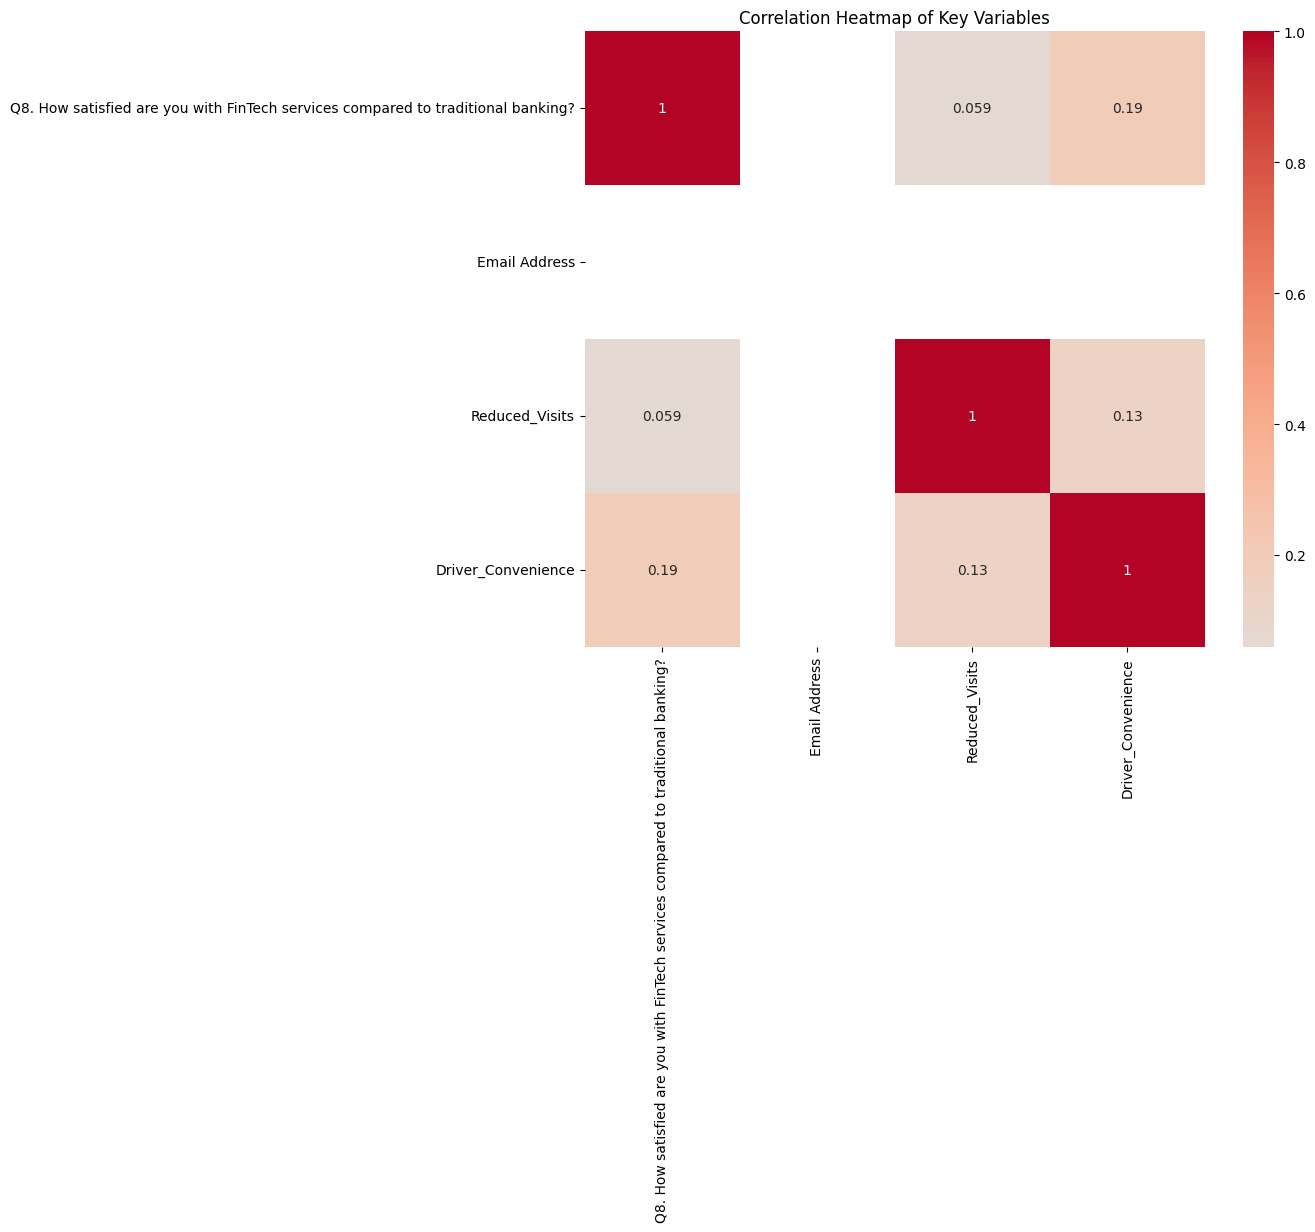

In [9]:
numeric_cols = df_model.select_dtypes(include=['float64', 'int64', 'uint8']).columns
corr = df_model[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

**Reasoning**:
The next step is to perform logistic regression as part of the statistical inference to model predictors of branch visit reduction, as specified in the original problem statement. This involves setting up the independent and dependent variables, fitting the model, and printing the summary and odds ratios.



In [10]:
import statsmodels.api as sm
import numpy as np

X = df_model[['Driver_Convenience'] + occupation_cols]
X = sm.add_constant(X)
y = df_model['Reduced_Visits']

logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=0)  # Suppress convergence messages
print(result.summary())
print("\nOdds Ratios:")
print(np.exp(result.params))
print("Interpretation: Convenience driver likely shows odds ratio >1, increasing probability of reduced visits.")

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

**Reasoning**:
The previous logistic regression failed because boolean columns from `pd.get_dummies` were being passed as `object` dtype to `statsmodels`, causing a `ValueError`. I will convert all boolean columns in `X` to integers (0 or 1) to ensure `statsmodels` receives numeric data.



In [11]:
import statsmodels.api as sm
import numpy as np

X = df_model[['Driver_Convenience'] + occupation_cols]
# Convert boolean columns to integer (0 or 1) before adding constant
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)
X = sm.add_constant(X)
y = df_model['Reduced_Visits']

logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=0)  # Suppress convergence messages
print(result.summary())
print("\nOdds Ratios:")
print(np.exp(result.params))
print("Interpretation: Convenience driver likely shows odds ratio >1, increasing probability of reduced visits.")

                           Logit Regression Results                           
Dep. Variable:         Reduced_Visits   No. Observations:                   92
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Jan 2026   Pseudo R-squ.:                  0.4487
Time:                        08:44:03   Log-Likelihood:                -7.2884
converged:                      False   LL-Null:                       -13.220
Covariance Type:            nonrobust   LLR p-value:                   0.03671
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  20.1105   1.19e+04      0.002      0.999   -2.34e+04    2.34e+04
Driver_Convenience                      1.3144      1.51

/tmp/ipython-input-2703838629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(int)
/tmp/ipython-input-2703838629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(int)
/tmp/ipython-input-2703838629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

**Reasoning**:
The previous logistic regression model suffered from a `ConvergenceWarning` and reported 'quasi-separation', indicated by extremely large standard errors and coefficients for some occupation categories. This typically occurs when a predictor perfectly predicts the outcome for a subset of observations. Additionally, a `SettingWithCopyWarning` was present. To address these, I will create a proper copy of the DataFrame for `X` to avoid `SettingWithCopyWarning` and simplify the model by removing the `Q3. Occupation_Other` and `Q3. Occupation_Unemployed` columns from the predictors, as these categories showed the most extreme coefficients and errors, likely causing the quasi-separation and non-convergence.



In [12]:
import statsmodels.api as sm
import numpy as np

# Filter out problematic occupation columns causing quasi-separation
filtered_occupation_cols = [col for col in occupation_cols if col not in ['Q3. Occupation_Other', 'Q3. Occupation_Unemployed']]

# Create a copy of the relevant columns from df_model to avoid SettingWithCopyWarning
X = df_model[['Driver_Convenience'] + filtered_occupation_cols].copy()

# Convert boolean columns to integer (0 or 1) before adding constant
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

X = sm.add_constant(X)
y = df_model['Reduced_Visits']

logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=0)  # Suppress convergence messages
print(result.summary())
print("\nOdds Ratios:")
print(np.exp(result.params))
print("Interpretation: Convenience driver likely shows odds ratio >1, increasing probability of reduced visits.")

                           Logit Regression Results                           
Dep. Variable:         Reduced_Visits   No. Observations:                   92
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            3
Date:                Mon, 19 Jan 2026   Pseudo R-squ.:                  0.2212
Time:                        08:44:29   Log-Likelihood:                -10.296
converged:                      False   LL-Null:                       -13.220
Covariance Type:            nonrobust   LLR p-value:                    0.1192
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.2572      0.915      1.374      0.169      -0.536       3.050
Driver_Convenience                      1.2610      1.28

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
